In [19]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Coletando dados ficticios

In [20]:
# Especifique o caminho para o arquivo CSV
caminho_arquivo_csv = "../Dados/alunos_vet_ficticios.csv"

# Carregue o arquivo CSV em um DataFrame
df = pd.read_csv(caminho_arquivo_csv)

df

,Media_Total,Coeficiente,Introducao_a_Programacao,Estrutura_de_Dados,Introducao_a_Programacao_Aprovado,Estrutura_de_Dados_Aprovado,Desempenho
0,6.748437,6.623780,2.291808,1.492419,0,0,Médio
1,8.842322,9.331187,9.554135,7.201338,1,1,Bem
2,8.567444,8.323023,2.959294,5.498499,0,0,Bem
3,7.393484,6.675646,9.388512,0.209364,1,0,Mal
4,6.836498,7.064244,7.004154,6.315824,1,1,Médio
...,...,...,...,...,...,...,...
995,5.935026,7.068823,0.049197,9.188964,0,1,Mal
996,9.310145,10.839681,0.658848,4.370339,0,0,Médio
997,8.138169,6.910574,2.779150,0.547032,0,0,Mal
998,9.467479,11.189241,8.005626,6.981398,1,1,Bem


### 1.1) Dividir os dados em recursos (X) e rótulos (y)

In [21]:
X = df[['Media_Total', 'Coeficiente', 'Introducao_a_Programacao', 'Estrutura_de_Dados', 'Introducao_a_Programacao_Aprovado', 'Estrutura_de_Dados_Aprovado']]
y = df['Desempenho']

## 2) Divisão em dados de treinamento e teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3) Treinando modelo 

In [23]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Teste diferentes valores para o número de vizinhos
    'weights': ['uniform', 'distance'],  # Teste pesos uniformes e ponderados pela distância
    'p': [1, 2],  # Teste distância de Manhattan (p=1) e distância Euclidiana (p=2)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_

best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

## 4) Predição

In [24]:
y_pred = best_knn.predict(X_test_scaled)

## 5) Matriz Confusão

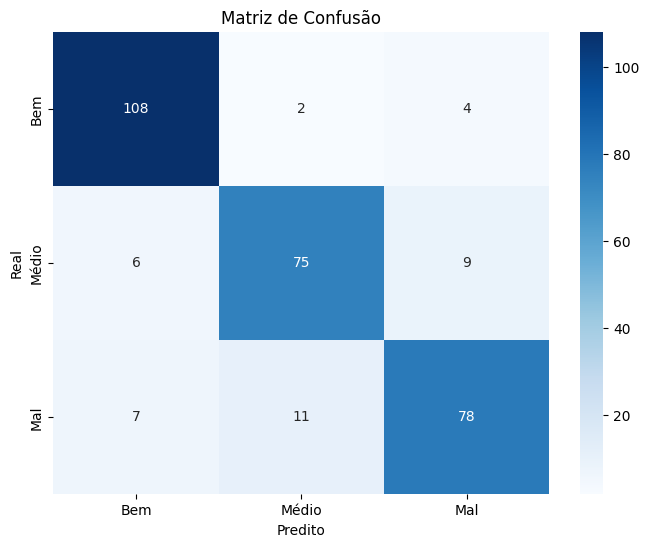

In [25]:
cm = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 6) Métricas de eficácia

In [26]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

# precision = precision_score(y_test, y_pred)  
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred) 
# print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
----------------------------------------------------------------
Acurácia: 0.87
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.89      0.95      0.92       114
         Mal       0.85      0.83      0.84        90
       Médio       0.86      0.81      0.83        96

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300

